Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Cleaning

In [2]:
train_data = pd.read_csv("../Data/train.csv")
test_data = pd.read_csv("../Data/test.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
people_survived = train_data["Survived"]
train_data = train_data.drop(["Survived"], axis = 1)

In [4]:
train_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train_idx = train_data["PassengerId"]
test_idx = test_data["PassengerId"]
combined_pd = pd.concat([train_data, test_data]).reset_index(drop = True)
combined_pd

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
combined_pd.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

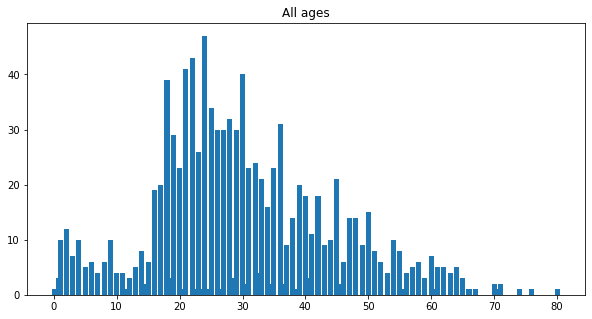

In [7]:
y = combined_pd["Age"].value_counts()
x = y.index.values

plt.figure(figsize = (10, 5))
plt.bar(x, y)
plt.title("All ages")
plt.show()

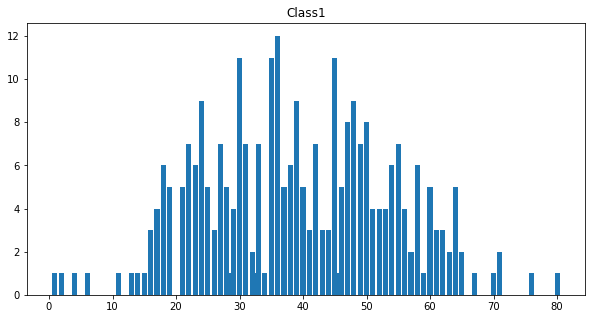

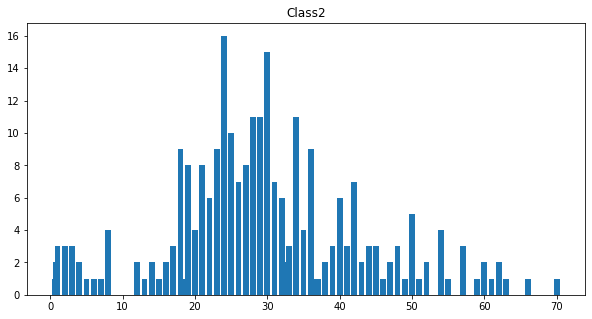

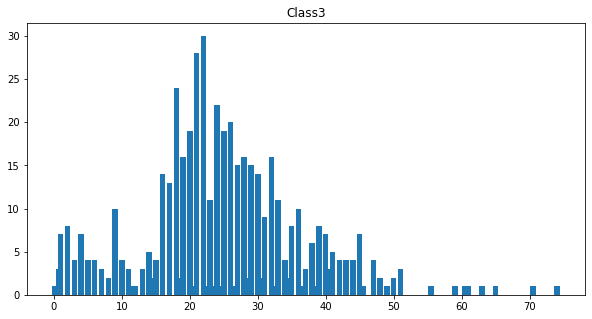

         Age
Pclass      
1       39.0
2       29.0
3       24.0


In [8]:
class_age = combined_pd[["Pclass", "Age"]]
for i in range(1, 4):
    plt.figure(figsize = (10, 5))
    plt.title("Class" + str(i))
    y = class_age[class_age["Pclass"] == i]["Age"].value_counts()
    x = y.index.values
    plt.bar(x, y)
    plt.show()
medians = class_age.groupby("Pclass").median()
print(medians)

In [9]:
for i in range(3):
    index = np.where((combined_pd["Pclass"] == i + 1) & (combined_pd["Age"].isnull()))[0]
    combined_pd.loc[index, "Age"] = medians.values[i][0]
combined_pd[combined_pd["Fare"].isnull()]

sim_fares = combined_pd[(combined_pd["Pclass"] == 3) & (combined_pd["Embarked"] == "S")]["Fare"]
combined_pd["Fare"].fillna(sim_fares.median(), inplace = True)

In [10]:
sim_embarked = combined_pd[(combined_pd["Pclass"] == 1) & (combined_pd["Fare"] >= 75.0) & (combined_pd["Fare"] <= 85.0)]["Embarked"]
most_embarked = sim_embarked.mode()[0]
combined_pd["Embarked"].fillna(most_embarked, inplace = True)

In [11]:
combined_pd["Cabin"].fillna("M", inplace = True)
combined_pd["Cabin"] = combined_pd["Cabin"].str[0]
print(combined_pd["Cabin"].value_counts())
index_t = np.where(combined_pd["Cabin"] == "T")[0]
combined_pd.loc[index_t, "Cabin"] = "M"

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64


In [12]:
print(combined_pd.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


end - Data cleaning

start - Data preprocessing

Name column

In [13]:
names = combined_pd["Name"]
display(names)
first_names = []
last_names = []
titles = []
for name in names:
    if ", " not in name:
        last_names.append("")
    else:
        last_name, name = name.split(", ", 1)
        last_names.append(last_name)
        
    if ". " not in name:
        titles.append("")
    else:
        title, first_name = name.split(". ", 1)
        titles.append(title)
        first_names.append(first_name)
        
first_names = np.array(first_names)   
last_names = np.array(last_names)
titles = np.array(titles)
print(np.unique(titles, return_counts = True))

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

(array(['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major',
       'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
       'the Countess'], dtype='<U12'), array([  1,   4,   1,   1,   8,   1,   1,   2,  61, 260,   2,   1, 757,
       197,   2,   8,   1,   1], dtype=int64))


In [14]:
#Grouping Military
index_military = np.isin(titles, ["Capt", "Col", "Major"])
titles[index_military] = "Military"

#Grouping Nobility
index_nobility = np.isin(titles, ["Don", "Dona", "Jonkheer", "Lady", "Master", "Sir", "the Countess"])
titles[index_nobility] = "Nobility"

#Grouping Ms
index_ms = np.isin(titles, ["Miss", "Mlle", "Ms"])
titles[index_ms] = "Ms"

#Grouping Mrs
index_mrs = np.isin(titles, ["Mrs", "Mme"])
titles[index_mrs] = "Mrs"

In [15]:
combined_pd["Title"] = titles
combined_pd

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr


Age column

In [16]:
bins = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
combined_pd["Age_Bin"] = pd.cut(combined_pd["Age"], bins)
combined_pd

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]"
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]"
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]"
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]"


Ticket column

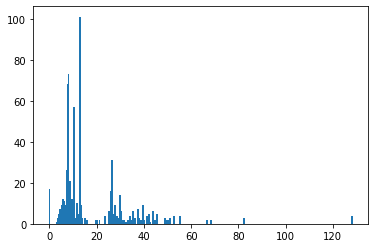

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,Ticket Count,Fare Per Ticket,Fare Bin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1,7.250000,"(0, 20]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2,35.641650,"(20, 40]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1,7.925000,"(0, 20]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2,26.550000,"(20, 40]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1,8.050000,"(0, 20]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]"
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]",3,36.300000,"(20, 40]"
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]",1,7.250000,"(0, 20]"
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]"


In [17]:
tickets_dict = dict(combined_pd["Ticket"].value_counts())

combined_pd["Ticket Count"] = combined_pd["Ticket"].map(tickets_dict)
combined_pd["Fare Per Ticket"] = combined_pd["Fare"] / combined_pd["Ticket Count"]

plt.bar(combined_pd["Fare Per Ticket"].value_counts().index.values, combined_pd["Fare Per Ticket"].value_counts())
plt.show()

bins = np.array([0, 20, 40, 60, 80, 150])
combined_pd["Fare Bin"] = pd.cut(combined_pd["Fare Per Ticket"], bins)
combined_pd

sibSp + Parch = how many family members you have in the titanic

In [18]:
combined_pd["Family On Board"] = combined_pd["SibSp"] + combined_pd["Parch"] + 1 # added the person as well
combined_pd

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Bin,Ticket Count,Fare Per Ticket,Fare Bin,Family On Board
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1,7.250000,"(0, 20]",2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2,35.641650,"(20, 40]",2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1,7.925000,"(0, 20]",1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2,26.550000,"(20, 40]",2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1,8.050000,"(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]",1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]",3,36.300000,"(20, 40]",1
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]",1,7.250000,"(0, 20]",1
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]",1


Delete unwanted columns

In [19]:
combined_pd.drop(["Name", "Fare", "Age", "Ticket", "Ticket Count", "Fare Per Ticket"], inplace = True, axis = 1)

In [20]:
combined_pd

,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_Bin,Fare Bin,Family On Board
0,1,3,male,1,0,M,S,Mr,"(20, 30]","(0, 20]",2
1,2,1,female,1,0,C,C,Mrs,"(30, 40]","(20, 40]",2
2,3,3,female,0,0,M,S,Ms,"(20, 30]","(0, 20]",1
3,4,1,female,1,0,C,S,Mrs,"(30, 40]","(20, 40]",2
4,5,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,0,0,M,S,Mr,"(20, 30]","(0, 20]",1
1305,1306,1,female,0,0,C,C,Nobility,"(30, 40]","(20, 40]",1
1306,1307,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
1307,1308,3,male,0,0,M,S,Mr,"(20, 30]","(0, 20]",1


end - data preprocessing

start - machine learning models

1. RandomForestClassifier (from sklearn.ensemble)
    What it does:
    A machine learning model based on an ensemble of decision trees. It is used for classification tasks.
    Each decision tree is trained on a random subset of the data and features, and the final prediction is made by averaging the predictions of all trees.
    
2. train_test_split (from sklearn.model_selection)
    What it does:
    Splits the dataset into training and testing subsets. This is essential to evaluate the performance of a model on unseen data.
    
3. RandomizedSearchCV (from sklearn.model_selection)
    What it does:
    Performs hyperparameter tuning by randomly sampling parameter combinations from a specified distribution.
    Faster than GridSearchCV when the parameter space is large.
    
4. GridSearchCV (from sklearn.model_selection)
    What it does:
    Performs exhaustive search over a specified parameter grid to find the best combination of hyperparameters for a model.
    Useful for small parameter spaces.
    
5. accuracy_score (from sklearn.metrics)
    What it does:
    Computes the accuracy of a classification model, which is the ratio of correctly predicted samples to the total samples.

6. MinMaxScaler (from sklearn.preprocessing)
    What it does:
    Scales features to a given range (default is 0 to 1). It is often used for normalization to ensure all features contribute equally to the model.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder 

In [22]:
combined_pd.set_index("PassengerId", inplace = True)
combined_pd

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_Bin,Fare Bin,Family On Board
PassengerId,,,,,,,,,,
1,3,male,1,0,M,S,Mr,"(20, 30]","(0, 20]",2
2,1,female,1,0,C,C,Mrs,"(30, 40]","(20, 40]",2
3,3,female,0,0,M,S,Ms,"(20, 30]","(0, 20]",1
4,1,female,1,0,C,S,Mrs,"(30, 40]","(20, 40]",2
5,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...
1305,3,male,0,0,M,S,Mr,"(20, 30]","(0, 20]",1
1306,1,female,0,0,C,C,Nobility,"(30, 40]","(20, 40]",1
1307,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1


Convert intervals and catagorical data into numeric values

In [23]:
label_enc = combined_pd.copy()

# The laborEncoder is looking for string values
label_enc = label_enc.astype(str)

label_enc = label_enc.apply(LabelEncoder().fit_transform)
label_enc["Fare Bin"].unique()

array([0, 1, 2, 4, 5, 3])

One hot Encoding

In [24]:
one_hot = label_enc.copy()
one_hot = pd.get_dummies(one_hot, columns = ["Sex", "Embarked", "Title"])
one_hot

,Pclass,SibSp,Parch,Cabin,Age_Bin,Fare Bin,Family On Board,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6
PassengerId,,,,,,,,,,,,,,,,,,,
1,2,1,0,7,2,0,2,0,1,0,0,1,0,0,1,0,0,0,0
2,0,1,0,2,3,1,2,1,0,1,0,0,0,0,0,1,0,0,0
3,2,0,0,7,2,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,0,1,0,2,3,1,2,1,0,0,0,1,0,0,0,1,0,0,0
5,2,0,0,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,2,0,0,7,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1306,0,0,0,2,3,1,0,1,0,1,0,0,0,0,0,0,0,1,0
1307,2,0,0,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0


Separating train and test data

In [25]:
X = one_hot.loc[train_idx].values
y = people_survived.values

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 19) (179, 19) (712,) (179,)


In [26]:
clf = RandomForestClassifier(random_state = 0)
clf.fit(X_train, y_train).score(X_test, y_test)

0.7932960893854749

In [27]:
params = {
    "criterion" : ["gini", "entropy"],
    "n_estimators" : [20, 50, 100, 200, 300, 400, 500, 800, 1000],
    "max_depth" : np.arange(3, 50),
    "min_samples_split" : np.arange(1, 1000),
    "max_features" : ["sqrt", "log2"],
    "max_samples" : np.linspace(0.1, 0.9, 10)
}

In [28]:
rand_search = RandomizedSearchCV(RandomForestClassifier(random_state = 0), params, scoring = "accuracy", random_state = 0, cv = 5)
rand_search.fit(X_train, y_train)

rand_params = rand_search.best_params_
print(rand_params, "\n")
print("Train Accuracy: ", rand_search.best_score_)
predctions = rand_search.predict(X_test)
print("Test Accuracy: ", accuracy_score(predctions, y_test))

{'n_estimators': 200, 'min_samples_split': 16, 'max_samples': 0.6333333333333333, 'max_features': 'sqrt', 'max_depth': 49, 'criterion': 'gini'} 

Train Accuracy:  0.8286417807544568
Test Accuracy:  0.8324022346368715


In [29]:
n_estimators = np.linspace(rand_params["n_estimators"] - 10, rand_params["n_estimators"] + 10, 3).astype(int)

min_samples_split = np.arange(rand_params["min_samples_split"] - 3, rand_params["min_samples_split"] + 3).astype(int)
max_samples = np.linspace(rand_params["max_samples"] - 0.5, rand_params["max_samples"] + 0.5, 6)
max_depth = np.arange(rand_params["max_depth"] - 5, rand_params["max_depth"] + 5).astype(int)

params = {
    "criterion" : [rand_params["criterion"]],
    "n_estimators" : n_estimators,
    "max_depth" : max_depth,
    "min_samples_split" : min_samples_split,
    "max_features" : [rand_params["max_features"]],
    "max_samples" : max_samples,
}

grid_search = GridSearchCV(RandomForestClassifier(random_state = 0), params, scoring = "accuracy", cv = 5)
grid_search.fit(X_train, y_train)

grid_params = grid_search.best_params_
print(grid_params, "\n")
print("Train Accuracy: ", grid_search.best_score_)
predctions = grid_search.predict(X_test)
print("Test Accuracy: ", accuracy_score(predctions, y_test))

{'criterion': 'gini', 'max_depth': 44, 'max_features': 'sqrt', 'max_samples': 0.5333333333333333, 'min_samples_split': 16, 'n_estimators': 190} 

Train Accuracy:  0.8328671328671329
Test Accuracy:  0.8268156424581006


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
900 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 385, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 117, in _get_n_samples_bootstrap
    raise ValueError(msg.format(max_s

In [30]:
from sklearn.ensemble import AdaBoostClassifier